In [198]:
import os
import surprise
from surprise import Reader, Dataset

file_path = os.path.expanduser('/Users/drakaris/Desktop/personalisation projects/personalization-theory-master/sampled_data.csv')
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_file(file_path, reader=reader)
data.split(n_folds=5) # data can now be used normally

In [199]:
from surprise import SVD, evaluate, GridSearch
from surprise import accuracy
algo=SVD()
trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)
SVDbestRMSE=accuracy.rmse(predictions, verbose=True)


RMSE: 0.7683


In [200]:
from surprise import SVD, evaluate, GridSearch
from surprise import accuracy
algo=SVD(n_factors=5000,lr_all = 0.01, reg_all = 0.04, n_epochs = 30)
trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)
SVDbestRMSE=accuracy.rmse(predictions, verbose=True)



RMSE: 0.0546


In [201]:
from surprise import SVDpp, evaluate, GridSearch
algo=SVDpp(n_factors=5000,lr_all= 0.012, reg_all= 0.04, n_epochs=30)

trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)
SVDppbestRMSE=accuracy.rmse(predictions, verbose=True)


RMSE: 0.0720


In [202]:
from surprise import NMF, evaluate
algo=NMF()

trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)
NMFbestRMSE=accuracy.rmse(predictions, verbose=True)


RMSE: 0.1821


In [203]:
from surprise import BaselineOnly
algo=BaselineOnly()
trainset = data.build_full_trainset()
algo.train(trainset)
testset = trainset.build_testset()
predictions = algo.test(testset)
BaselinebestRMSE=accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 1.0919


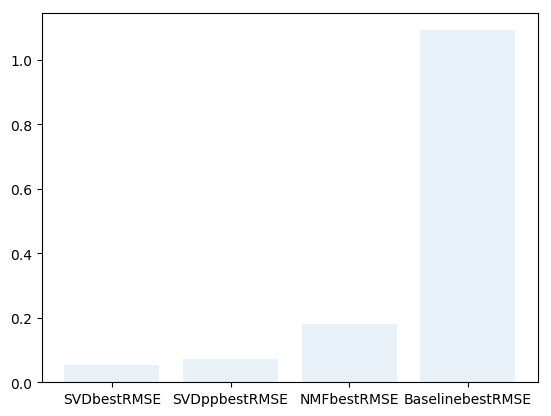

In [204]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ("SVDbestRMSE","SVDppbestRMSE","NMFbestRMSE","BaselinebestRMSE")
y_pos = np.arange(len(objects))
performance = [SVDbestRMSE, SVDppbestRMSE,NMFbestRMSE,BaselinebestRMSE]
plt.bar(y_pos, performance, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
plt.show()
